In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

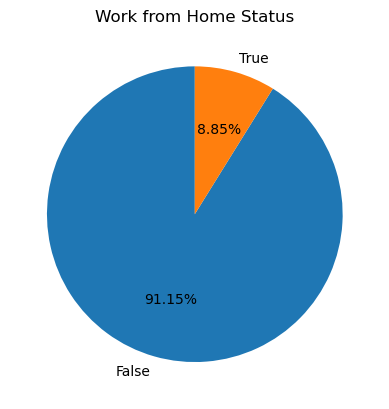

In [ ]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.2f%%')
plt.title("Work from Home Status")
plt.ylabel("")
plt.show()

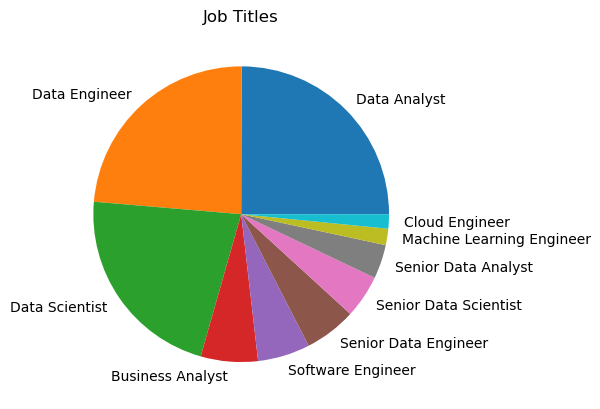

In [7]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title("Job Titles")
plt.ylabel("")
plt.show()

In [21]:
job_requirements = {
  'job_work_from_home':'Work from Home',
  'job_no_degree_mention': 'Job Degree Required', 
  'job_health_insurance': 'Health Insurance Offered'
}

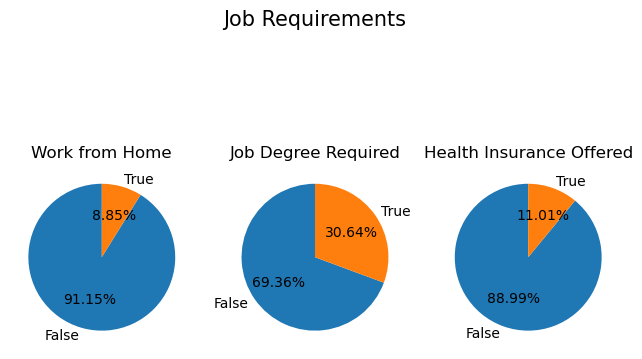

In [30]:
(fig, ax) = plt.subplots(1,3)
for (i,(column,title)) in enumerate(job_requirements.items()):
  df_plot= df[column].value_counts()
  #df_plot.plot(kind='pie', startangle=90, autopct='%1.2f%%', ax=ax[i], fig=fig, title=f"{title}")
  ax[i].pie(df_plot,autopct='%1.2f%%',startangle=90, labels=['False','True'] )
  ax[i].set_ylabel("")
  ax[i].set_title(title)
  
fig.suptitle("Job Requirements", fontsize=15)
fig.tight_layout()
plt.show()  

In [81]:
data = {
  "job_skills": ["python","sql","java","c++","c#","javascript","html","css","php","ruby"],
  "skill_count": [30,25,20,15,10,5,4,3,2,1],
  "skill_pay": [100,90,80,70,60,50,40,30,20,10]
}
df_example = pd.DataFrame(data=data)
#df_example.set_index("job_skills", inplace=True)

In [84]:
df_example

,job_skills,skill_count,skill_pay
0,python,30,100
1,sql,25,90
2,java,20,80
3,c++,15,70
4,c#,10,60
5,javascript,5,50
6,html,4,40
7,css,3,30
8,php,2,20
9,ruby,1,10


In [87]:
print(df_example['skill_count'].iloc[0])
print(df_example['skill_pay'].iloc[0])

30
100


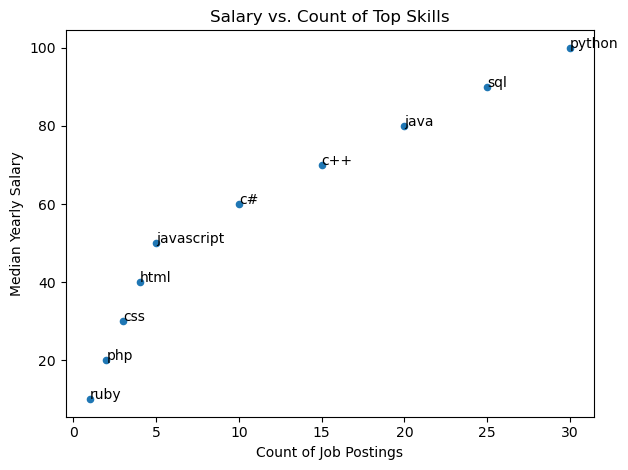

In [86]:
df_example.plot(kind='scatter', x='skill_count', y='skill_pay')
for (i,job_skill) in enumerate(df_example["job_skills"]):
  plt.text(df_example['skill_count'].iloc[i], df_example['skill_pay'].iloc[i], job_skill)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills')
plt.tight_layout()
plt.show()

In [65]:
df_example

,job_skills,skill_count,skill_pay
0,python,30,100
1,sql,25,90
2,java,20,80
3,c++,15,70
4,c#,10,60
5,javascript,5,50
6,html,4,40
7,css,3,30
8,php,2,20
9,ruby,1,10


In [42]:
df_exploded = df[df['job_title_short']=='Data Analyst'].explode('job_skills')

In [88]:
# (df_exploded[(df_exploded['salary_year_avg'].notna()) ].groupby(by=['job_skills'])['salary_year_avg'].agg(['median','size'])
#   .sort_values('size',ascending=False)
# )
df_skill_stats=(df_exploded.groupby(by=['job_skills'])
  .agg(
    median_salary=('salary_year_avg','median'), 
    skill_count=('job_skills','count')
   )
  .sort_values('skill_count',ascending=False)
  .head(10)
)

In [90]:
df_skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


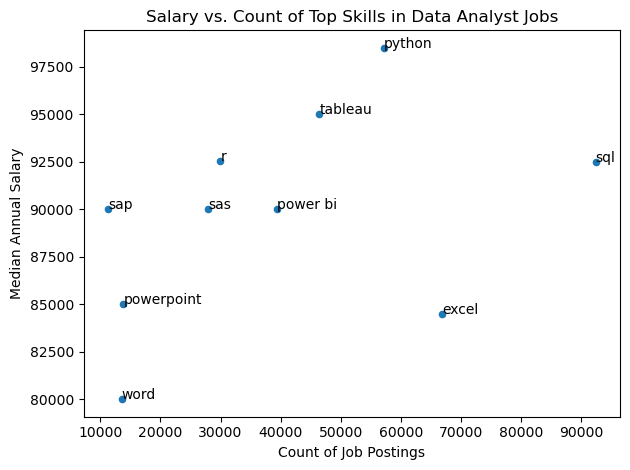

In [94]:
df_skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# for job_skill in df_skill_stats.index:
#   plt.text(df_skill_stats['skill_count'].loc[job_skill], df_skill_stats['median_salary'].loc[job_skill], job_skill)

for (i,job_skill) in enumerate(df_skill_stats.index):
  plt.text(df_skill_stats['skill_count'].iloc[i], df_skill_stats['median_salary'].iloc[i], job_skill)  

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Annual Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()